<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-06-21 17:42:59--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite’

survey-results-publ 100%[===================>] 201.62M  66.1MB/s    in 3.1s    

2025-06-21 17:43:07 (66.1 MB/s) - ‘survey-results-public.sqlite’ saved [211415040/211415040]



#### 2. Connect to the Database


**Install the needed libraries**


In [2]:
!pip install pandas

In [3]:
!pip install matplotlib

In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [5]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [6]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [7]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


In [18]:
import sqlite3
import pandas as pd

# Connect to database
conn = sqlite3.connect('survey-data.sqlite')

# Query JobSat column sample
query = """
SELECT JobSat
FROM main
LIMIT 20
"""

df = pd.read_sql_query(query, conn)
conn.close()

print(df)


    JobSat
0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
8      NaN
9      NaN
10     8.0
11     NaN
12     8.0
13     NaN
14     NaN
15     5.0
16     NaN
17     NaN
18    10.0
19     NaN


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


<Figure size 1200x600 with 0 Axes>

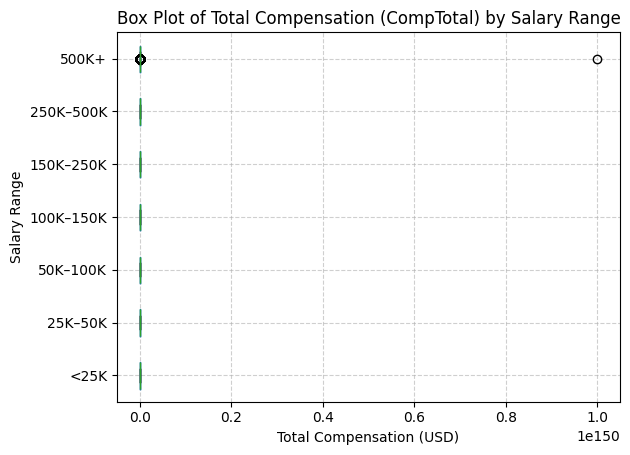

In [10]:
# your code goes here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Connect to SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Step 2: Query the compensation column
df = pd.read_sql_query("SELECT CompTotal FROM main", conn)
conn.close()

# Step 3: Clean the data
df = df.dropna(subset=['CompTotal'])
df = df[df['CompTotal'] > 0]

# Step 4: Define salary bins and labels
bins = [0, 25000, 50000, 100000, 150000, 250000, 500000, float('inf')]
labels = ['<25K', '25K–50K', '50K–100K', '100K–150K', '150K–250K', '250K–500K', '500K+']
df['SalaryRange'] = pd.cut(df['CompTotal'], bins=bins, labels=labels, right=False)

# Step 5: Plot the box plot for CompTotal within each salary range
plt.figure(figsize=(12, 6))
df.boxplot(column='CompTotal', by='SalaryRange', showfliers=True, vert=False)

# Step 6: Customize plot
plt.title('Box Plot of Total Compensation (CompTotal) by Salary Range')
plt.suptitle('')
plt.xlabel('Total Compensation (USD)')
plt.ylabel('Salary Range')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


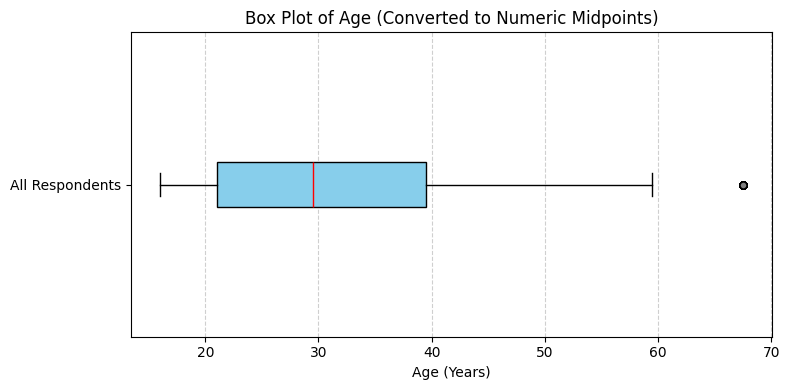

In [11]:
# your code goes here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Connect to database and load Age column
conn = sqlite3.connect('survey-data.sqlite')
df = pd.read_sql_query("SELECT Age FROM main", conn)
conn.close()

# Step 2: Drop missing values
df = df.dropna(subset=['Age'])

# Step 3: Map age ranges to numeric midpoints
age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 67.5
}
df['AgeNumeric'] = df['Age'].map(age_map)

# Step 4: Drop any rows where mapping failed
df = df.dropna(subset=['AgeNumeric'])

# Step 5: Create box plot
plt.figure(figsize=(8, 4))
plt.boxplot(df['AgeNumeric'], vert=False, patch_artist=True,
            boxprops=dict(facecolor='skyblue', color='black'),
            medianprops=dict(color='red'),
            flierprops=dict(marker='o', markerfacecolor='gray', markersize=5, linestyle='none'))

# Step 6: Customize plot
plt.title('Box Plot of Age (Converted to Numeric Midpoints)')
plt.xlabel('Age (Years)')
plt.yticks([1], ['All Respondents'])
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


<Figure size 1200x600 with 0 Axes>

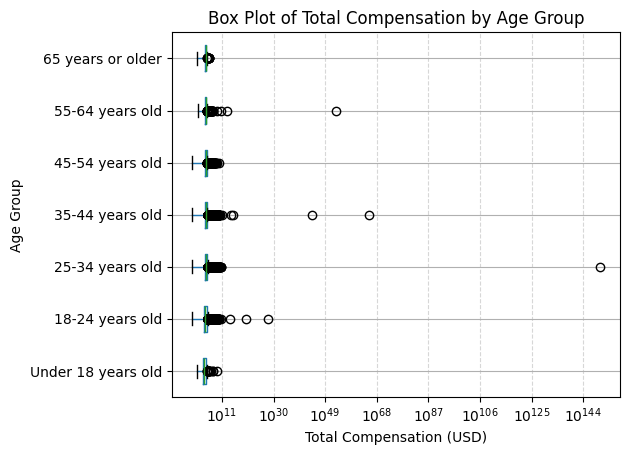

In [16]:
# your code goes here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect and load data
conn = sqlite3.connect('survey-data.sqlite')
df = pd.read_sql_query("SELECT Age, CompTotal FROM main", conn)
conn.close()

# Clean data
df = df.dropna(subset=['Age', 'CompTotal'])
df = df[df['CompTotal'] > 0]

# Set proper age order
age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old',
    '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older'
]
df = df[df['Age'].isin(age_order)]
df['Age'] = pd.Categorical(df['Age'], categories=age_order, ordered=True)

# Box plot of numeric compensation grouped by age
plt.figure(figsize=(12, 6))
df.boxplot(column='CompTotal', by='Age', showfliers=True, vert=False)
plt.title('Box Plot of Total Compensation by Age Group')
plt.suptitle('')
plt.xlabel('Total Compensation (USD)')
plt.ylabel('Age Group')
plt.xscale('log')  # Helps with right-skewed salary data
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


<Figure size 1000x600 with 0 Axes>

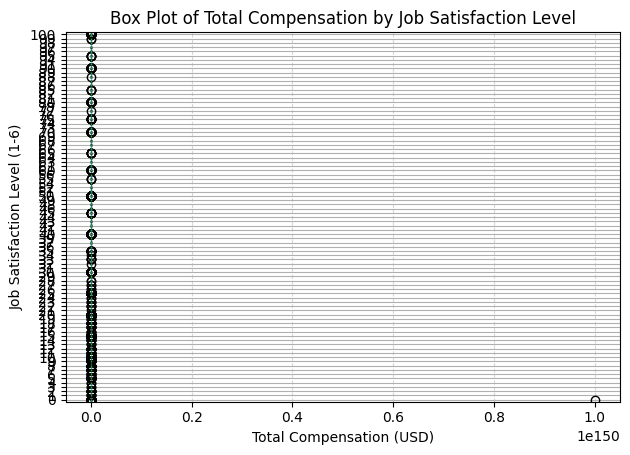

In [24]:
# your code goes here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Connect to database and load relevant data
conn = sqlite3.connect('survey-data.sqlite')
df = pd.read_sql_query("SELECT CompTotal, JobSatPoints_6 FROM main", conn)
conn.close()

# Step 2: Clean data - remove missing and non-positive compensation or missing job satisfaction
df = df.dropna(subset=['CompTotal', 'JobSatPoints_6'])
df = df[df['CompTotal'] > 0]

# Convert JobSatPoints_6 to categorical for ordering (if not already)
df['JobSatPoints_6'] = df['JobSatPoints_6'].astype(int)
df['JobSatPoints_6'] = pd.Categorical(df['JobSatPoints_6'], ordered=True)

# Step 3: Plot the box plot
plt.figure(figsize=(10, 6))
df.boxplot(column='CompTotal', by='JobSatPoints_6', vert=False, showfliers=True)

# Step 4: Customize the plot
plt.title('Box Plot of Total Compensation by Job Satisfaction Level')
plt.suptitle('')  # Remove default subtitle
plt.xlabel('Total Compensation (USD)')
plt.ylabel('Job Satisfaction Level (1-6)')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()


### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


/tmp/ipykernel_1687/855498885.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top['DevType'] = pd.Categorical(df_top['DevType'], categories=top_devtypes, ordered=True)


<Figure size 1200x600 with 0 Axes>

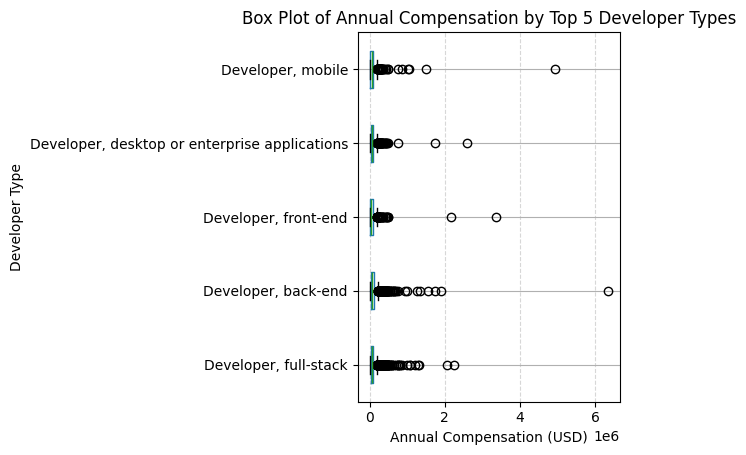

In [25]:
# your code goes here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Connect and load data
conn = sqlite3.connect('survey-data.sqlite')
df = pd.read_sql_query("SELECT DevType, ConvertedCompYearly FROM main", conn)
conn.close()

# Step 2: Clean data: drop missing or invalid values
df = df.dropna(subset=['DevType', 'ConvertedCompYearly'])
df = df[df['ConvertedCompYearly'] > 0]

# Step 3: Some respondents may list multiple roles separated by semicolon or comma
# Split DevType if needed and explode into separate rows
# Example assuming semicolon-separated roles:
df['DevType'] = df['DevType'].str.split(';')
df = df.explode('DevType')
df['DevType'] = df['DevType'].str.strip()

# Step 4: Identify top 5 most common developer types
top_devtypes = df['DevType'].value_counts().head(5).index.tolist()

# Filter for those top 5 developer types
df_top = df[df['DevType'].isin(top_devtypes)]
df_top['DevType'] = pd.Categorical(df_top['DevType'], categories=top_devtypes, ordered=True)

# Step 5: Plot box plot
plt.figure(figsize=(12, 6))
df_top.boxplot(column='ConvertedCompYearly', by='DevType', vert=False, showfliers=True)

plt.title('Box Plot of Annual Compensation by Top 5 Developer Types')
plt.suptitle('')
plt.xlabel('Annual Compensation (USD)')
plt.ylabel('Developer Type')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


/tmp/ipykernel_1687/2254607031.py:28: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1200x600 with 0 Axes>

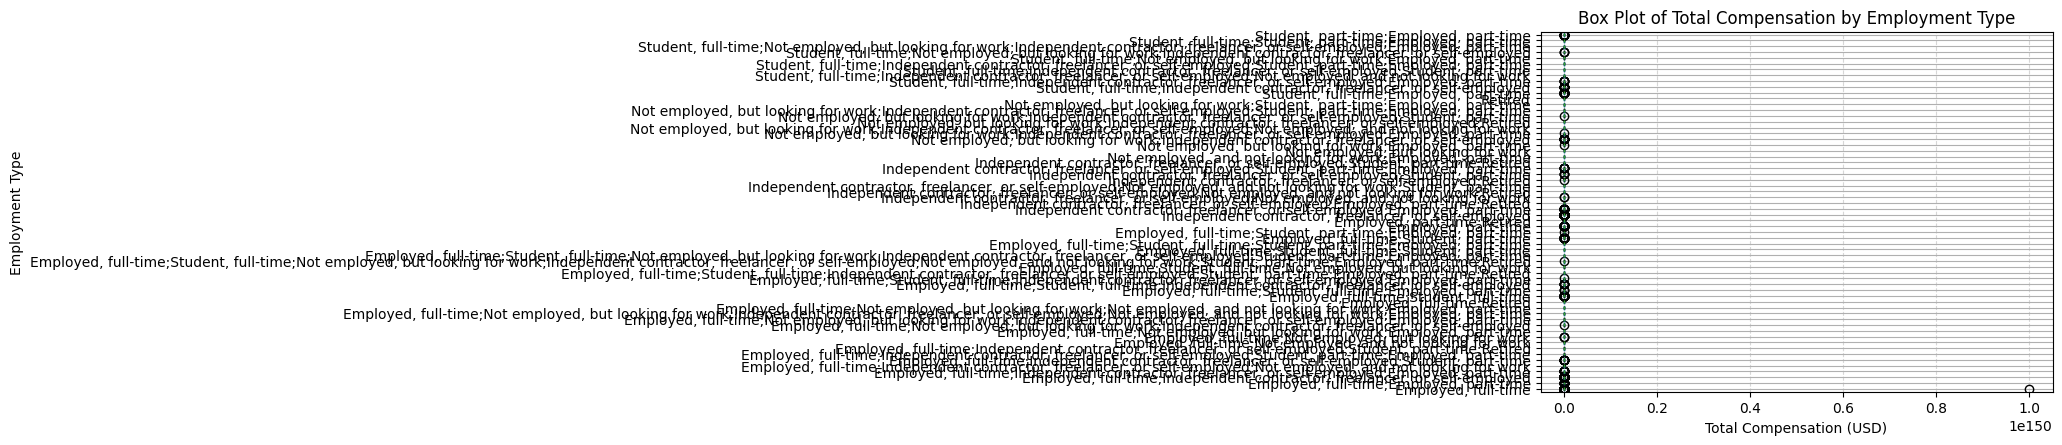

In [26]:
# your code goes here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to database and load data
conn = sqlite3.connect('survey-data.sqlite')
df = pd.read_sql_query("SELECT Employment, CompTotal FROM main", conn)
conn.close()

# Clean data: drop rows with missing Employment or non-positive CompTotal
df = df.dropna(subset=['Employment', 'CompTotal'])
df = df[df['CompTotal'] > 0]

# Optionally, make Employment categorical for better ordering (if needed)
# For example, you can order by frequency or keep alphabetical:
df['Employment'] = pd.Categorical(df['Employment'])

# Plot box plot of CompTotal by Employment type
plt.figure(figsize=(12, 6))
df.boxplot(column='CompTotal', by='Employment', vert=False, showfliers=True)

plt.title('Box Plot of Total Compensation by Employment Type')
plt.suptitle('')  # Remove automatic subtitle
plt.xlabel('Total Compensation (USD)')
plt.ylabel('Employment Type')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


<Figure size 1000x600 with 0 Axes>

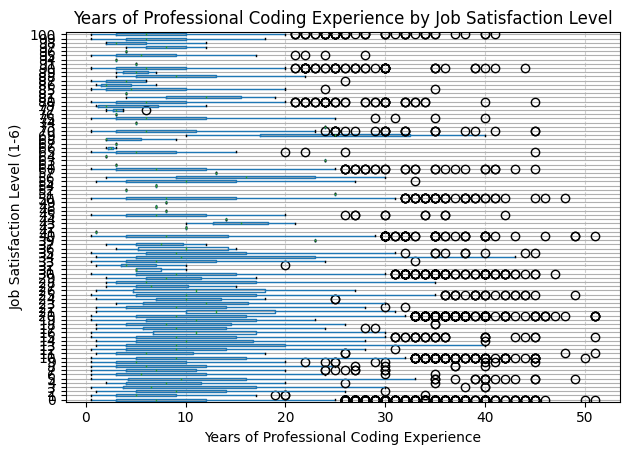

In [19]:
# your code goes here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the database and load YearsCodePro and JobSatPoints_6
conn = sqlite3.connect('survey-data.sqlite')
df = pd.read_sql_query("SELECT YearsCodePro, JobSatPoints_6 FROM main", conn)
conn.close()

# Function to convert YearsCodePro strings to numeric values
def convert_years(x):
    if pd.isnull(x):
        return None
    if x == 'Less than 1 year':
        return 0.5
    if x == 'More than 50 years':
        return 51
    try:
        return float(x)
    except:
        return None

df['YearsCodeProNumeric'] = df['YearsCodePro'].apply(convert_years)

# Drop rows with missing data in YearsCodeProNumeric or JobSatPoints_6
df = df.dropna(subset=['YearsCodeProNumeric', 'JobSatPoints_6'])

# Ensure JobSatPoints_6 is integer/categorical for grouping
df['JobSatPoints_6'] = df['JobSatPoints_6'].astype(int)
df['JobSatPoints_6'] = pd.Categorical(df['JobSatPoints_6'], ordered=True)

# Plot box plot
plt.figure(figsize=(10, 6))
df.boxplot(column='YearsCodeProNumeric', by='JobSatPoints_6', vert=False)

# Customize plot
plt.title('Years of Professional Coding Experience by Job Satisfaction Level')
plt.suptitle('')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction Level (1-6)')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [ ]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
